In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

# Network

In [3]:
def NN(m1, m2, w1, w2, b):
    z = m1 * w1 + m2 * w2 + b
    return sigmoid(z)
        
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Data

In [4]:
l_length = [3, 4, 3.5, 5.5, 2, 3, 2, 1]
l_width = [1.5, 1.5, .5, 1, 1, 1, .5, 1]
color = [0, 0, 0, 0, 1, 1, 1, 1]
data = []

# Dataframe

In [5]:
i = 0
for l in l_length:
    w = l_width[i]
    c = color[i]
    data.append([l, w, c])
    i += 1

data_f = pd.DataFrame(data, columns=['Length', 'Width', 'Color'])

# Prediction

In [6]:
prediction = []
for characteristics in data:
    l = characteristics[0]
    w = characteristics[1]
    prediction.append(NN(l, w, w1, w2, b))

In [7]:
data_f['Prediction'] = prediction

# Cost and Slope 

In [8]:
error = data_f['Prediction'] - data_f['Color']
data_f['Cost %'] = (error**2)*100
data_f['Cost %'] = data_f['Cost %'].astype(int)
data_f['Slope'] = 2*error

# Training & Cost Graph

In [9]:
# Train
data_f['Prediction'] = data_f['Prediction'] - 0.1 * data_f['Slope']
error = data_f['Prediction'] - data_f['Color']
data_f['Slope'] = 2*error
data_f['Cost %'] = (error**2)*100
data_f['Cost %'] = data_f['Cost %'].astype(int)

# Graph
blue = 0
red = 1
possible_prediction = np.linspace(0,1,1000)
b_prediction = data_f['Prediction'].loc[0]
r_prediction = data_f['Prediction'].loc[4]
blue_cost = (possible_prediction - blue)**2
red_cost = (possible_prediction - red)**2

## <font color='blue'>1) BLUE</font>

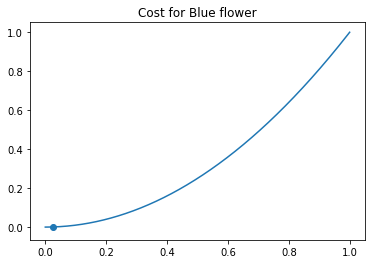

In [10]:
plt.plot(possible_prediction, blue_cost)
plt.title('Cost for Blue flower')
plt.scatter(b_prediction, (b_prediction - blue)**2)
plt.show()

## <font color='red'>2) RED</font>

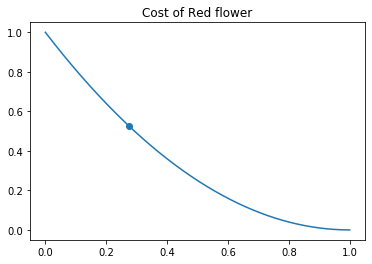

In [11]:
plt.plot(possible_prediction, red_cost)
plt.scatter(r_prediction, (r_prediction - red)**2)
plt.title('Cost of Red flower')
plt.show()

# All Data Visualisation

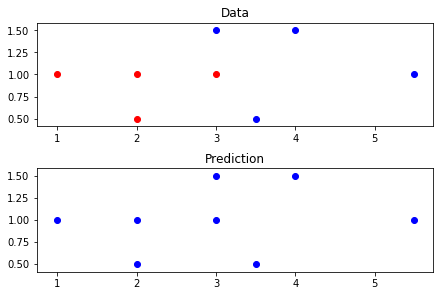

In [12]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
ax[0].set_title('Data')
ax[1].set_title('Prediction')

for label, row in data_f.iterrows():
    l = row['Length']
    w = row['Width']
    p = row['Prediction']
    c = row['Color']
    
    if c >= 0.5:
        ax[0].scatter(l, w, color="red")
    else:
        ax[0].scatter(l, w, color="blue")     
        
    if p >= 0.5:
        ax[1].scatter(l, w, color="red")        
    else:
        ax[1].scatter(l, w, color="blue") 

# Main Data

In [13]:
data_f

,Length,Width,Color,Prediction,Cost %,Slope
0,3.0,1.5,0,0.0,0,0.1
1,4.0,1.5,0,0.0,0,0.0
2,3.5,0.5,0,0.0,0,0.0
3,5.5,1.0,0,0.0,0,0.0
4,2.0,1.0,1,0.3,52,-1.5
5,3.0,1.0,1,0.2,60,-1.6
6,2.0,0.5,1,0.3,53,-1.5
7,1.0,1.0,1,0.4,34,-1.2
